In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import *
from keras.models import *
from keras.applications import *
from keras.optimizers import *
from keras.layers import Dense, Conv2D, Flatten
import re
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)
training_images = mnist.train.images
training_labels = mnist.train.labels
validation_images = mnist.validation.images
validation_labels = mnist.validation.labels
test_images = mnist.test.images
test_labels = mnist.test.labels

training_images = training_images.reshape(55000,28,28,1)
validation_images = validation_images.reshape(5000,28,28,1)
test_images = test_images.reshape(10000,28,28,1)


iteration = 100
stride_size = 1
filter_size = 3


'''Make a Deep Learning Model'''
model = Sequential()
model.add(Conv2D(8,kernel_size=filter_size,strides=stride_size,activation='relu',
                             input_shape = (28,28,1),kernel_regularizer=regularizers.l2()))
     
model.add(Conv2D(8,kernel_size=filter_size,strides=stride_size,activation='relu',
                             input_shape = (28,28,1),kernel_regularizer=regularizers.l2()))
     
           
# model.add(Conv2D(8,kernel_size=filter_size,strides=stride_size,activation='relu'))
# model.add(Conv2D(8,kernel_size=filter_size,strides=stride_size,activation='relu'))


model.add(MaxPooling2D((2,2)))
model.add(Flatten()) 
model.add(Dense(24,kernel_initializer='uniform', activation='relu'))
model.add(Dense(10,kernel_initializer='uniform', activation='softmax'))
    
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# model.summary()



     


Using TensorFlow backend.


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.








In [2]:

'''Fit the Model'''
cnn = model.fit(training_images, training_labels, validation_data=(validation_images, validation_labels), epochs = iteration,batch_size=512)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 55000 samples, validate on 5000 samples
Epoch 1/100
55000/55000 [==============================] - 4s 69us/step - loss: 1.1309 - acc: 0.7225 - val_loss: 0.4381 - val_acc: 0.8936
Epoch 2/100
55000/55000 [==============================] - 1s 27us/step - loss: 0.4183 - acc: 0.8964 - val_loss: 0.3648 - val_acc: 0.9092
Epoch 3/100
55000/55000 [==============================] - 1s 27us/step - loss: 0.3655 - acc: 0.9083 - val_loss: 0.3248 - val_acc: 0.9206
Epoch 4/100
55000/55000 [==============================] - 1s 27us/step - loss: 0.3332 - acc: 0.9149 - val_loss: 0.2999 - val_acc: 0.9290
Epoch 5/100
55000/55000 [==============================] - 1s 27us/step - loss: 0.3095 - acc: 0.9208 - val_loss: 0.2830 - val_acc: 0.9298
Epoch 6/100
55000/55000 [==============================] - ETA: 0s - loss: 0.2861 - acc: 0.926 - 1s 27us/step - loss: 0.2864 - acc: 0.9265 - val_loss: 0.2556 - val_ac

Epoch 55/100
55000/55000 [==============================] - 1s 27us/step - loss: 0.0857 - acc: 0.9817 - val_loss: 0.0996 - val_acc: 0.9750
Epoch 56/100
55000/55000 [==============================] - 1s 27us/step - loss: 0.0831 - acc: 0.9827 - val_loss: 0.1007 - val_acc: 0.9762
Epoch 57/100
55000/55000 [==============================] - 1s 27us/step - loss: 0.0821 - acc: 0.9827 - val_loss: 0.0994 - val_acc: 0.9750
Epoch 58/100
55000/55000 [==============================] - 1s 27us/step - loss: 0.0816 - acc: 0.9830 - val_loss: 0.1026 - val_acc: 0.9744
Epoch 59/100
55000/55000 [==============================] - 1s 27us/step - loss: 0.0810 - acc: 0.9832 - val_loss: 0.0996 - val_acc: 0.9776
Epoch 60/100
55000/55000 [==============================] - 1s 27us/step - loss: 0.0793 - acc: 0.9835 - val_loss: 0.0968 - val_acc: 0.9782
Epoch 61/100
55000/55000 [==============================] - 1s 27us/step - loss: 0.0801 - acc: 0.9830 - val_loss: 0.0994 - val_acc: 0.9750
Epoch 62/100
55000/55000 [=

In [3]:
scores = model.evaluate(test_images, test_labels, batch_size=128, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))
      

10000/10000 [==============================] - 0s 19us/step

Test result: 97.930 loss: 0.085


In [9]:
'''Get the weight and bias from model while training'''
np.set_printoptions(suppress=True)
weight = []
for i in range(0,len(model.layers)):
    weights = model.layers[i].get_weights()
    if len(weights) > 0:
        weight.append(weights)
for i in range(0,len(weight)):
    layer_weight = []
    for j in range(0,len(weight[i])):
        for k in range(0,len(weight[i][j])):
            layer_weight.append(weight[i][j][k])
#             print(layer_weight)
    with open('layer_' + str(i) + '.txt', 'w') as f:
        for item in layer_weight:
            f.write("%s\n" % item)
    f.close()

In [10]:
conv1=[]
conv2=[]
dense1=[]
dense2=[]
file_in1 = open('layer_0.txt').read()
file_in2 = open('layer_1.txt').read()
file_in3 = open('layer_2.txt').read()
file_in4 = open('layer_3.txt').read()
Obj = re.compile("[-+]?\d*\.\d+")
alldata1 = Obj.findall(file_in1)
alldata2 = Obj.findall(file_in2)
alldata3 = Obj.findall(file_in3)
alldata4 = Obj.findall(file_in4)
for i in alldata1:conv1.append(float(i))
for i in alldata2:conv2.append(float(i))
for i in alldata3:dense1.append(float(i))
for i in alldata4:dense2.append(float(i))


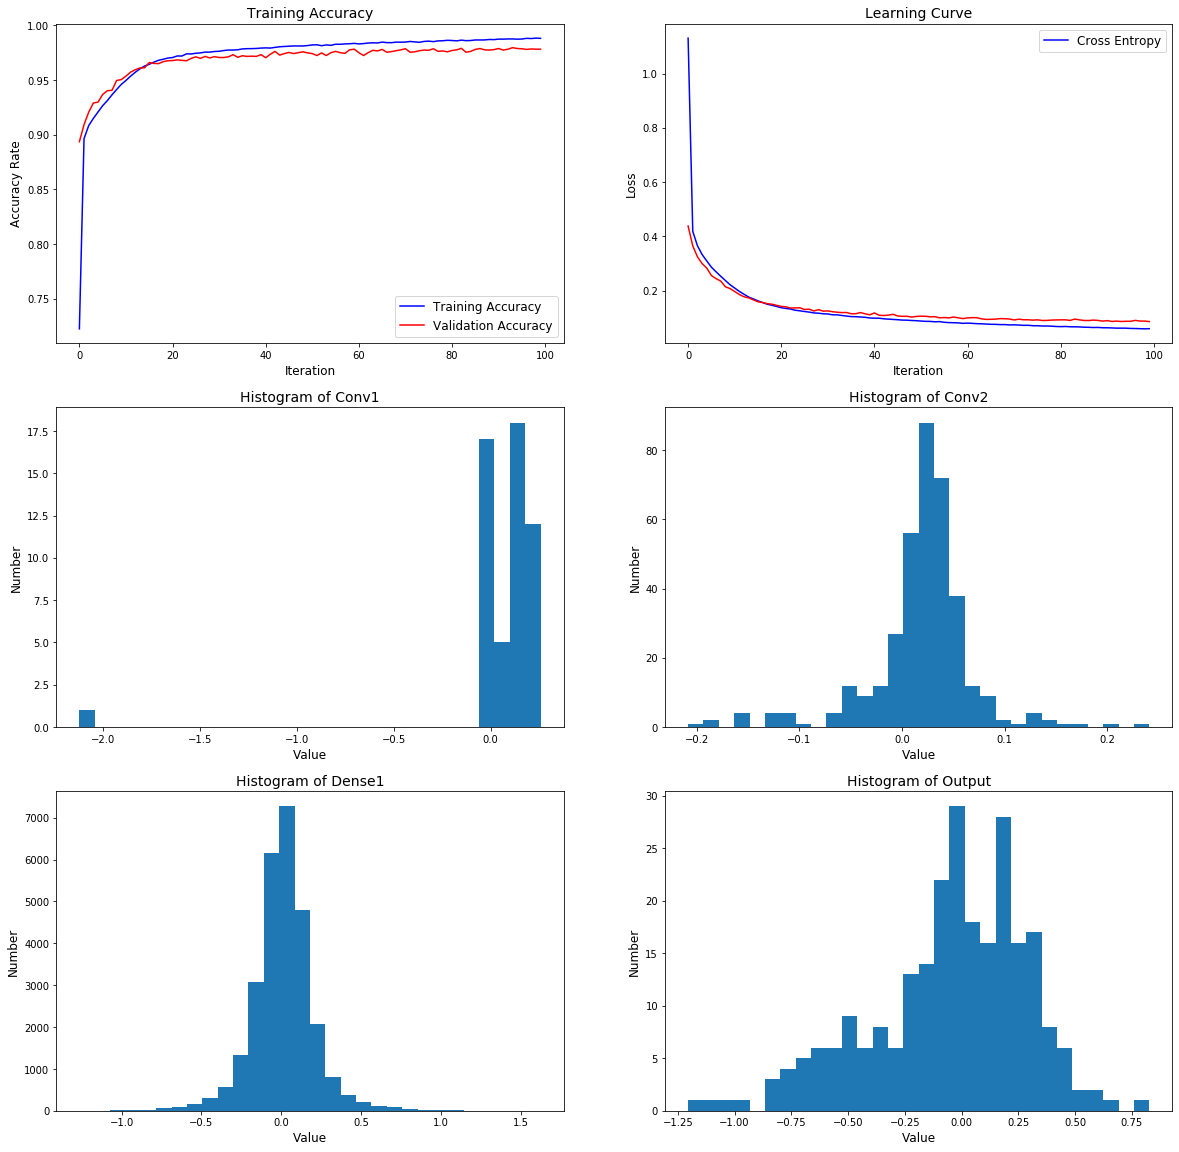

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


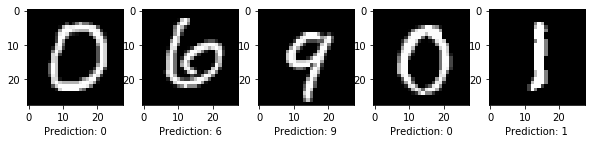

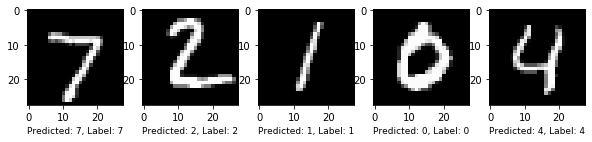

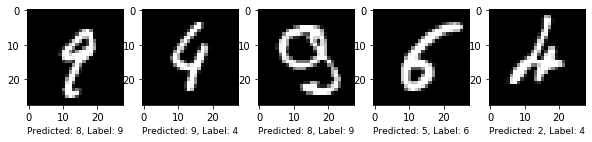

In [6]:

fig, ((ax1, ax2),(ax3,ax4), (ax5,ax6)) = plt.subplots(nrows=3, ncols=2,figsize=(20,20))

ax1.plot(cnn.history['acc'], 'b',cnn.history['val_acc'], 'r')
ax1.set_ylabel('Accuracy Rate',fontsize=12)
ax1.set_xlabel('Iteration',fontsize=12)
ax1.set_title('Training Accuracy',fontsize=14)
ax1.legend(['Training Accuracy','Validation Accuracy'],fontsize=12,loc='best')

ax2.plot(cnn.history['loss'], 'b',cnn.history['val_loss'], 'r')
ax2.set_ylabel('Loss',fontsize=12)
ax2.set_xlabel('Iteration',fontsize=12)
ax2.set_title('Learning Curve',fontsize=14)
ax2.legend(['Cross Entropy'],fontsize=12,loc='best')

ax3.hist(conv1, bins = 30)
ax3.set_ylabel('Number',fontsize=12)
ax3.set_xlabel('Value',fontsize=12)
ax3.set_title('Histogram of Conv1',fontsize=14)

ax4.hist(conv2, bins = 30)
ax4.set_ylabel('Number',fontsize=12)
ax4.set_xlabel('Value',fontsize=12)
ax4.set_title('Histogram of Conv2',fontsize=14)

ax5.hist(dense1, bins = 30)
ax5.set_ylabel('Number',fontsize=12)
ax5.set_xlabel('Value',fontsize=12)
ax5.set_title('Histogram of Dense1',fontsize=14)

ax6.hist(dense2, bins = 30)
ax6.set_ylabel('Number',fontsize=12)
ax6.set_xlabel('Value',fontsize=12)
ax6.set_title('Histogram of Output',fontsize=14)

plt.savefig('acc.png')
plt.show()
#Test the model
test_lbl = input_data.read_data_sets("MNIST_data/", one_hot = False).test.labels

label_pred=[]
for i in range(0,len(test_images)):
    predicted = model.predict_classes(test_images[i].reshape(1,28,28,1))
    label_pred.append(predicted)
plt.figure(figsize=(10,4))
for index, (image, label) in enumerate(zip(test_images[10:15], label_pred[10:15])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.xlabel('Prediction: %i\n' % label, fontsize = 10)
    plt.savefig('prediction.png')
    
idx = 0
correct = []
correct_lbl=[]
classifiedIndexes = []
for label, predict in zip(test_lbl, label_pred):
    if predict == label: 
        classifiedIndexes.append(idx)
    idx +=1
plt.figure(figsize=(10,4))
for plotIndex, goodIndex in enumerate(classifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    correct.append(*label_pred[goodIndex])
    correct_lbl.append(test_lbl[goodIndex])
    plt.imshow(np.reshape(test_images[goodIndex], (28,28)), cmap=plt.cm.gray)
    plt.xlabel('Predicted: {}, Label: {}'.format(*label_pred[goodIndex], test_lbl[goodIndex]), fontsize = 9)
    plt.savefig('classified.png')
    
index = 0
incorrect =[]
incorrect_lbl=[]
misclassifiedIndexes = []
for label, predict in zip(test_lbl, label_pred):
    if predict != label: 
        misclassifiedIndexes.append(index)
    index +=1
plt.figure(figsize=(10,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    incorrect.append(*label_pred[badIndex])
    incorrect_lbl.append(test_lbl[badIndex])
    plt.imshow(np.reshape(test_images[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.xlabel('Predicted: {}, Label: {}'.format(*label_pred[badIndex], test_lbl[badIndex]), fontsize = 9)
    plt.savefig('miss-classified.png')
    
    

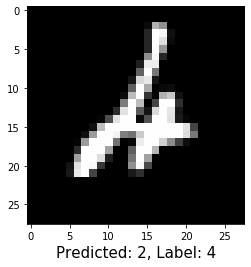

In [17]:
plt.imshow(np.reshape(test_images[badIndex], (28,28)), cmap=plt.cm.gray)
plt.xlabel('Predicted: {}, Label: {}'.format(*label_pred[badIndex], test_lbl[badIndex]), fontsize = 15)
plt.savefig('f-plt-b.png')

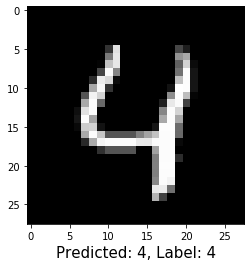

In [18]:
plt.imshow(np.reshape(test_images[goodIndex], (28,28)), cmap=plt.cm.gray)
plt.xlabel('Predicted: {}, Label: {}'.format(*label_pred[goodIndex], test_lbl[badIndex]), fontsize = 15)
plt.savefig('f-plt-g.png')

Displaying activation map 0


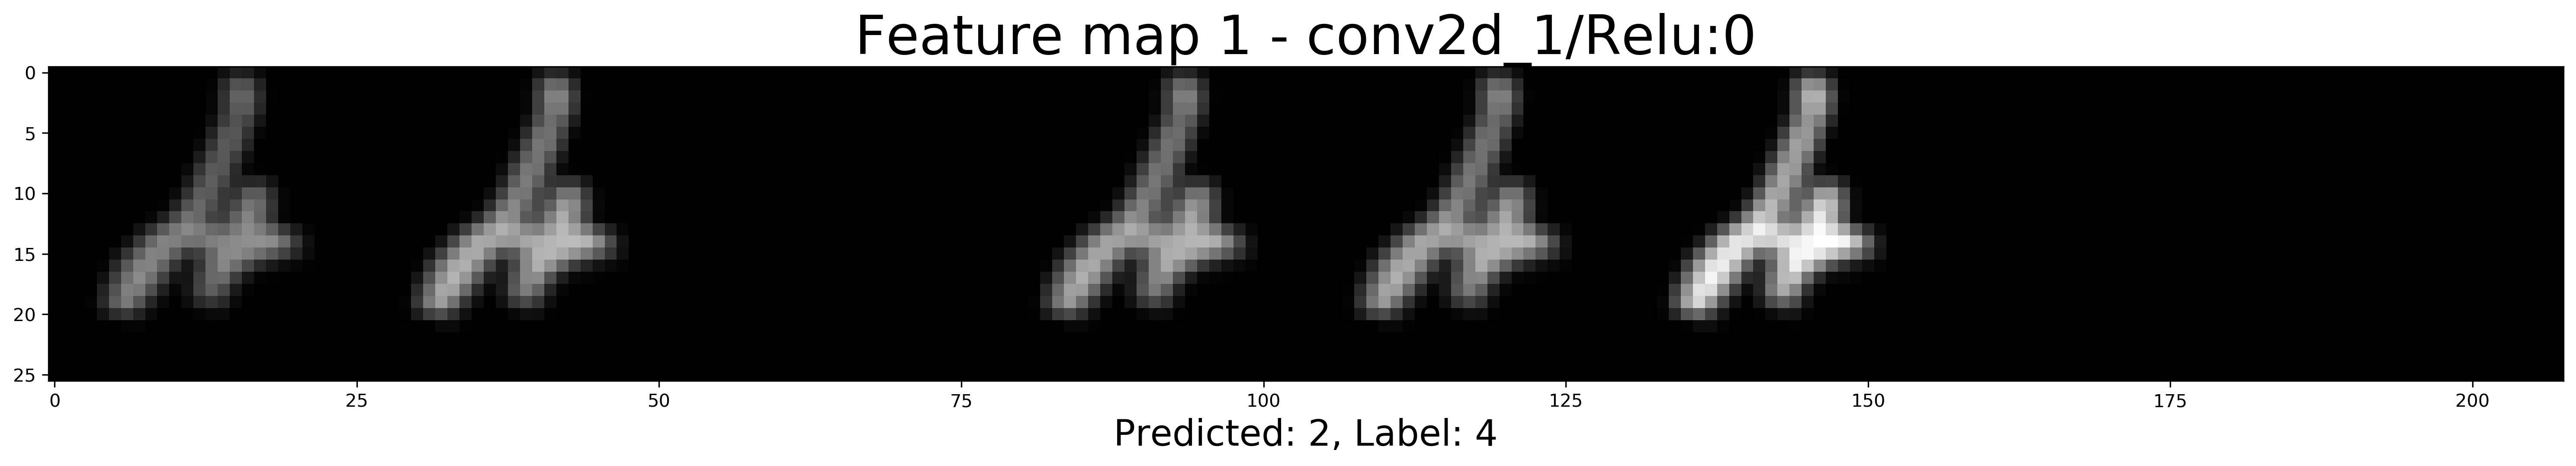

Displaying activation map 1


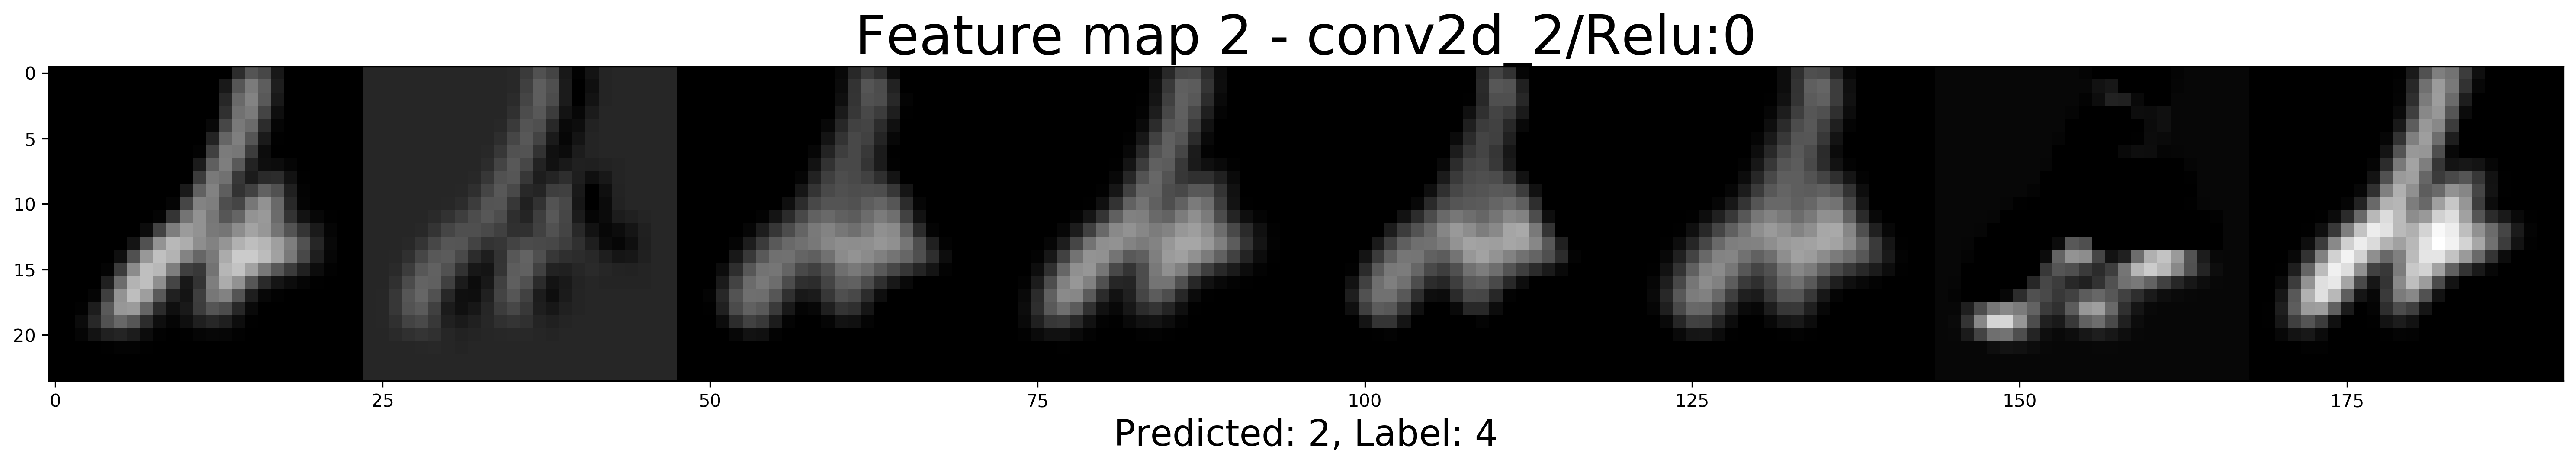

Displaying activation map 2


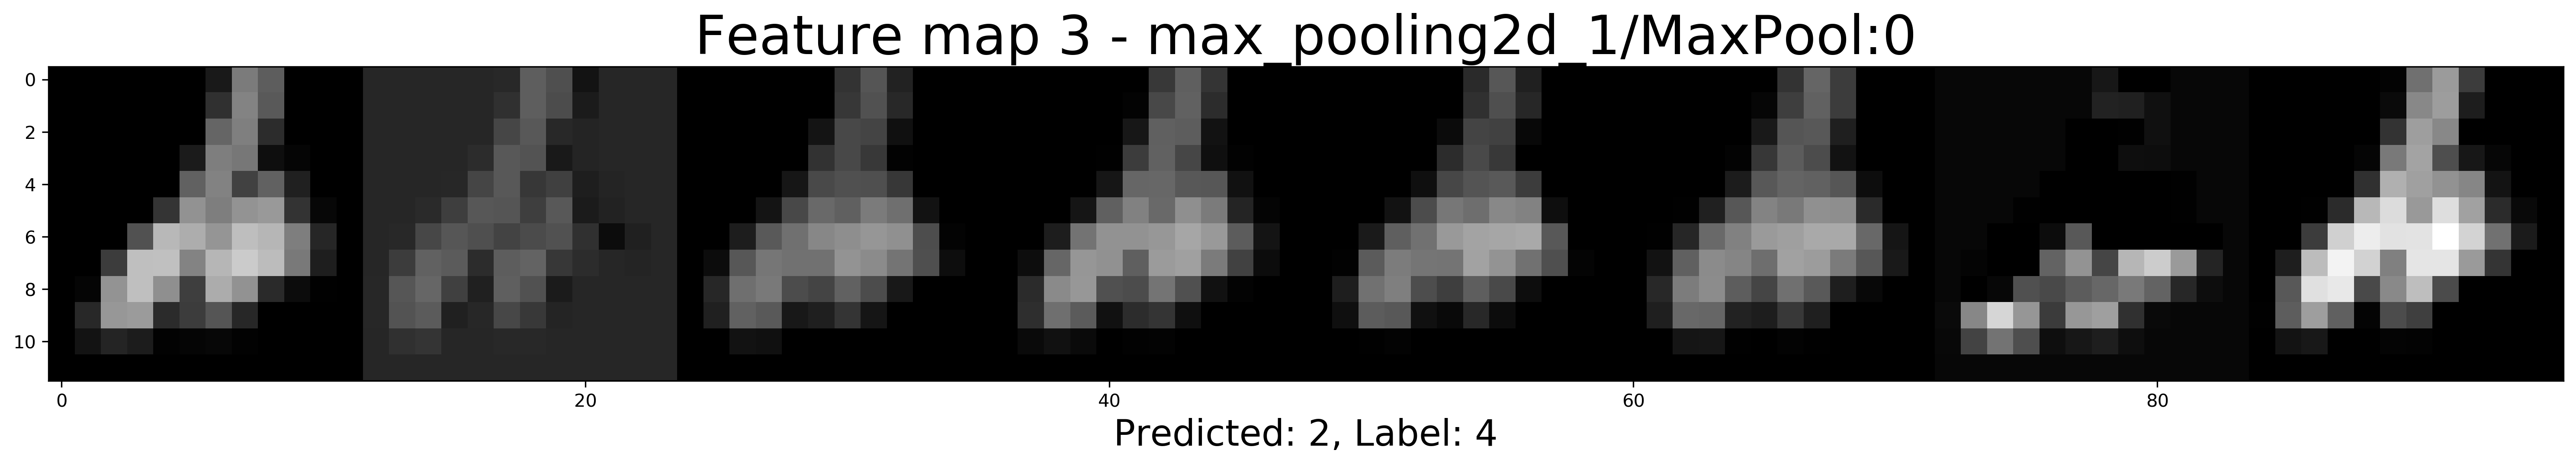

Displaying activation map 3


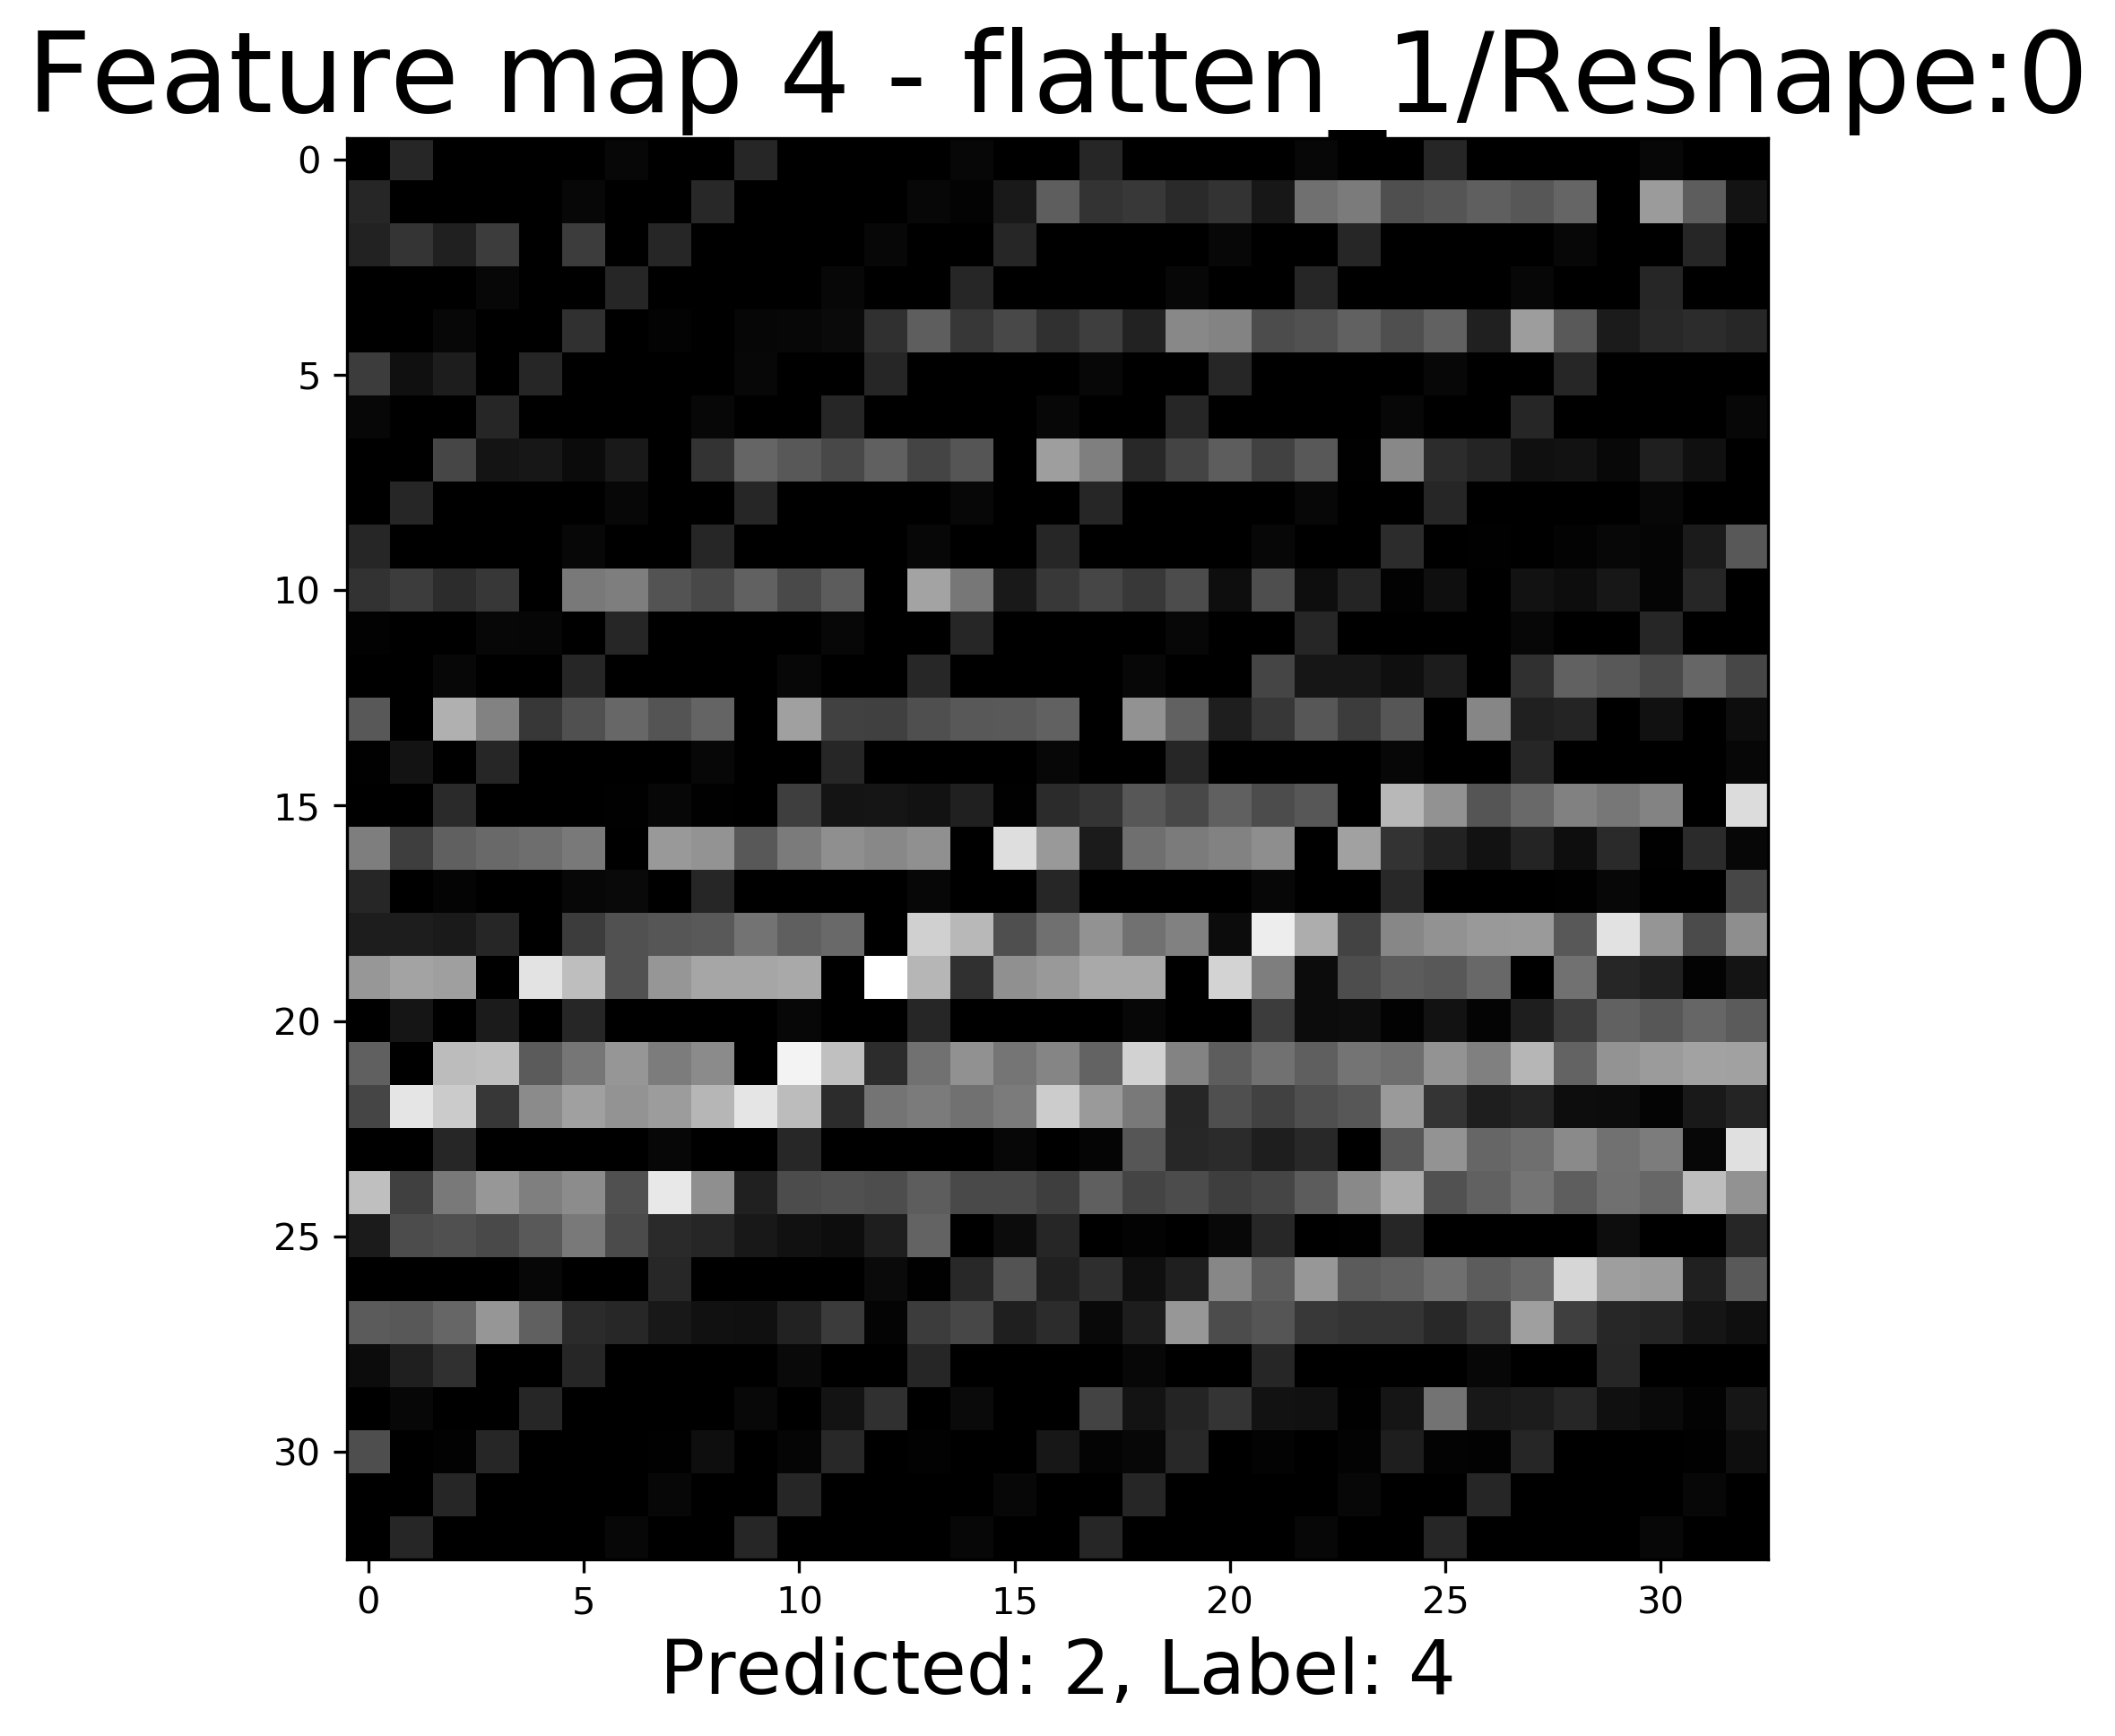

Displaying activation map 4


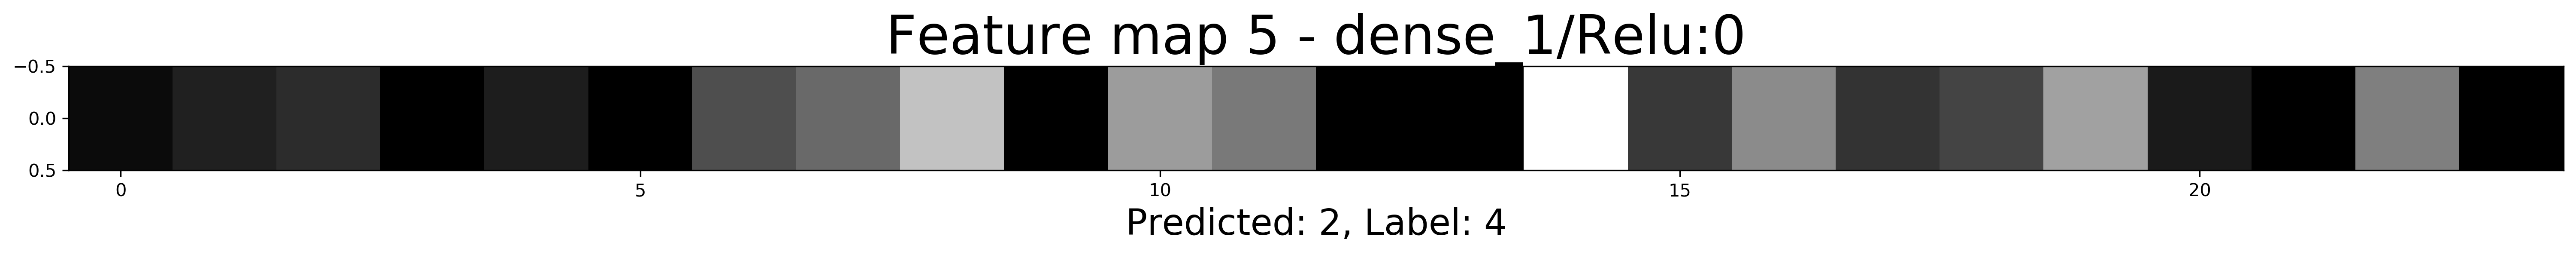

Displaying activation map 5


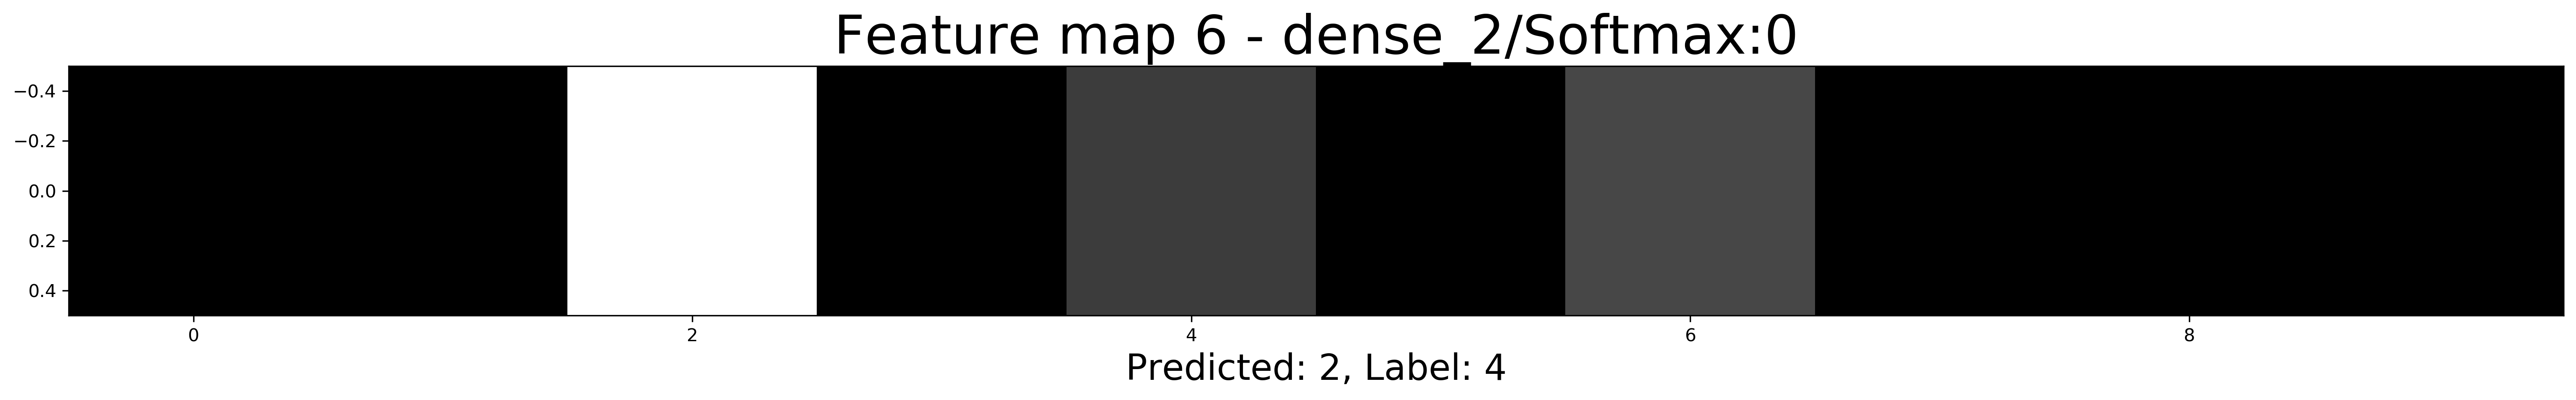

In [15]:
layer_plot = 0
def feature_maps(model, model_inputs, layer_name=None):
    feature_maps = []
    inp_mod = model.input

    model_multi_inputs_cond = True
    if not isinstance(inp_mod, list):
        # only one input! let's wrap it in a list.
        inp_mod = [inp_mod]
        model_multi_inputs_cond = False

    outputs = [layer.output for layer in model.layers if
               layer.name == layer_name or layer_name is None]  
    outputs = [output for output in outputs if 'input_' not in output.name]

    funcs = [K.function(inp_mod + [K.learning_phase()], [out]) for out in outputs]  # evaluation functions

    if model_multi_inputs_cond:
        list_inputs = []
        list_inputs.extend(model_inputs)
        list_inputs.append(0.)
    else:
        list_inputs = [model_inputs, 0.]

    feature_maps = [func(list_inputs)[0] for func in funcs]
    layer_names = [output.name for output in outputs]

    result = dict(zip(layer_names, feature_maps))
    return result


def features_plot(features,layer_plot):
    layer_names = list(features.keys())
    feature_maps = list(features.values())
    batch_size = feature_maps[0].shape[0]
    assert batch_size == 1, 'One image at a time to visualize.'
    for i, f_map in enumerate(feature_maps):
        plt.close()
        print('Displaying activation map {}'.format(i))
        shape = f_map.shape
        if len(shape) == 4:
            features = np.hstack(np.transpose(f_map[0], (2, 0, 1)))
        elif len(shape) == 2:
            features = f_map[0]
            num_features = len(features)
            if num_features > 1024: 
                square_size = int(np.floor(np.sqrt(num_features)))
                features = features[0: square_size * square_size]
                features = np.reshape(features, (square_size, square_size))
            else:
                features = np.expand_dims(features, axis=0)
        else:
            raise Exception('len(shape) = 3 has not been implemented.')
        plt.figure(layer_plot,figsize=(25,7),dpi=300)
        plt.title('Feature map ' +str(i+1) +' - '+ layer_names[i],fontsize=30)
        plt.xlabel('Predicted: {}, Label: {}'.format(incorrect[4],incorrect_lbl[4]), fontsize = 20)
        plt.imshow(features, interpolation='None', cmap=plt.cm.gray)
        plt.savefig('layer_' +str(i)+'_b.png')
        layer_plot += 1
        plt.show()
    return layer_plot

feature_maps = feature_maps(model, test_images[misclassifiedIndexes[4]].reshape(1,28,28,1))
layer_plot = features_plot(feature_maps,layer_plot)

Displaying activation map 0


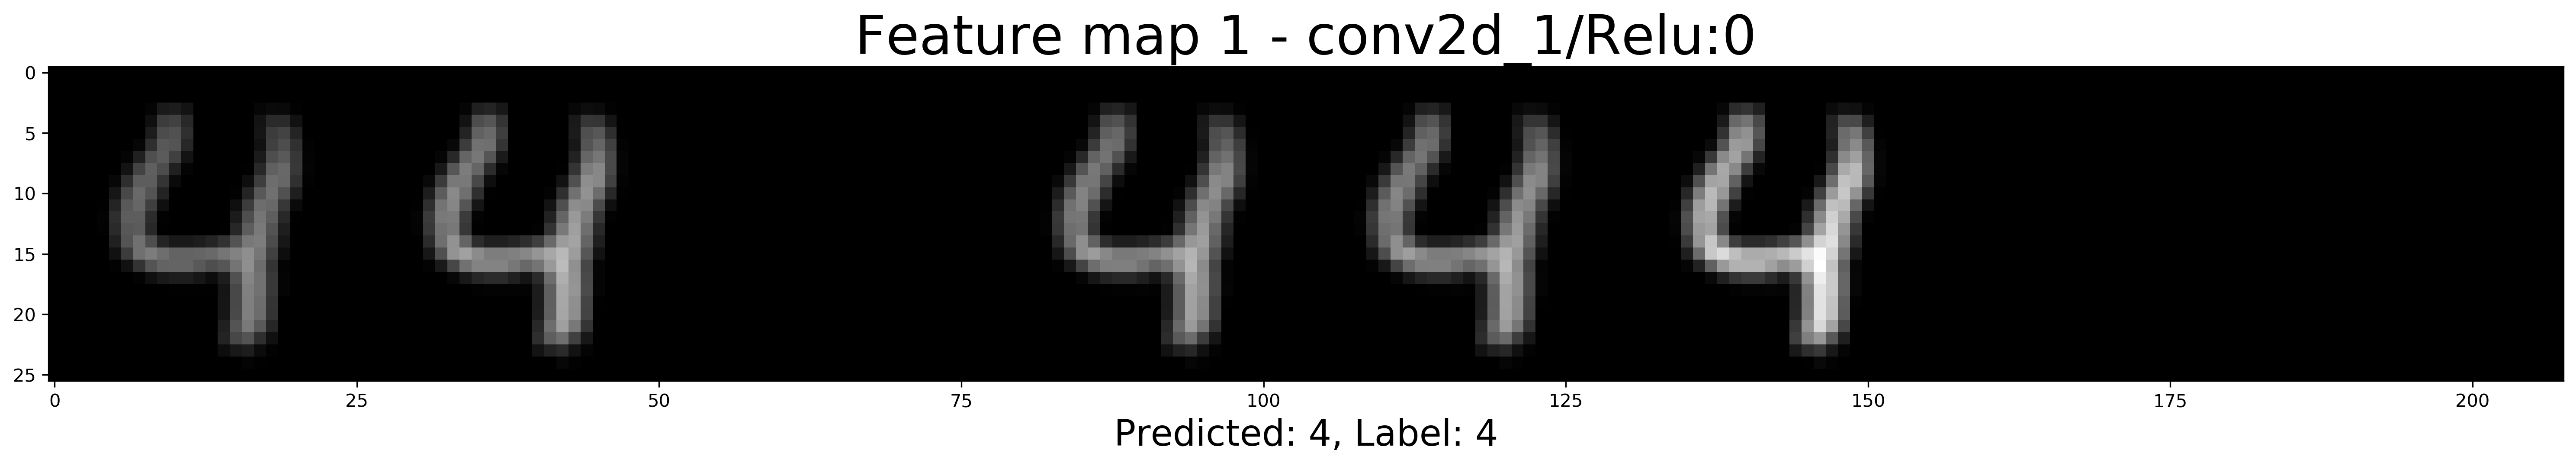

Displaying activation map 1


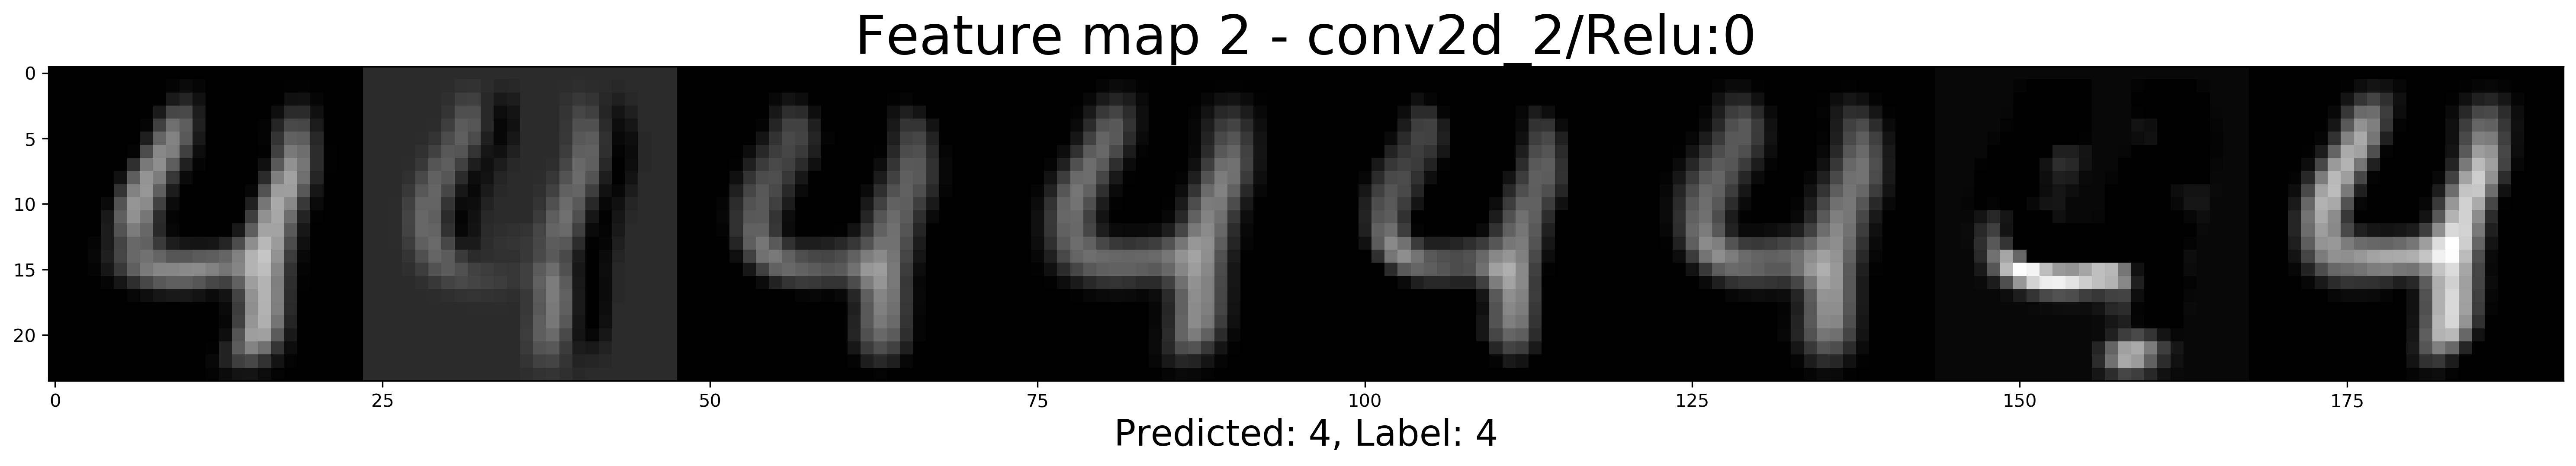

Displaying activation map 2


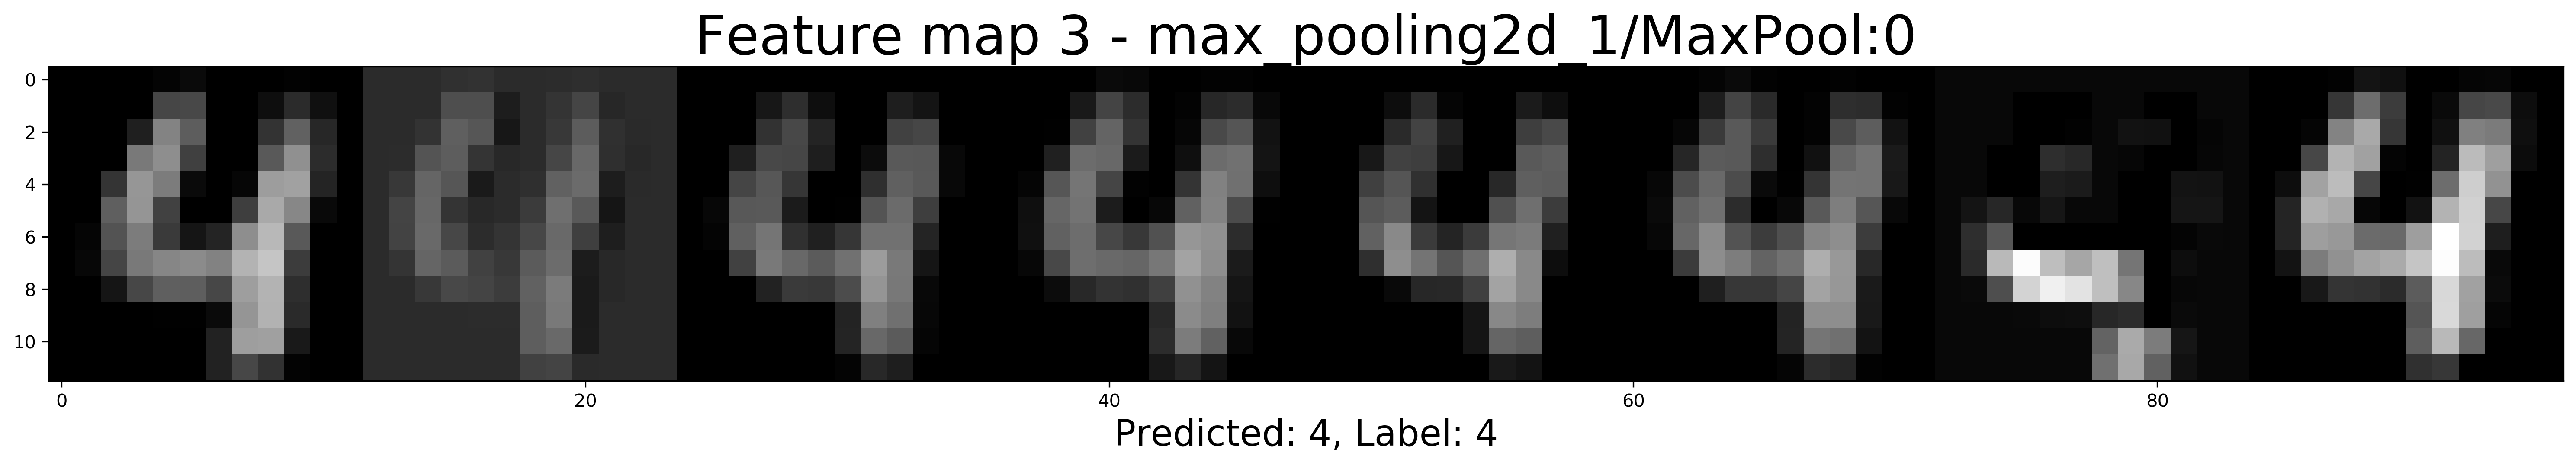

Displaying activation map 3


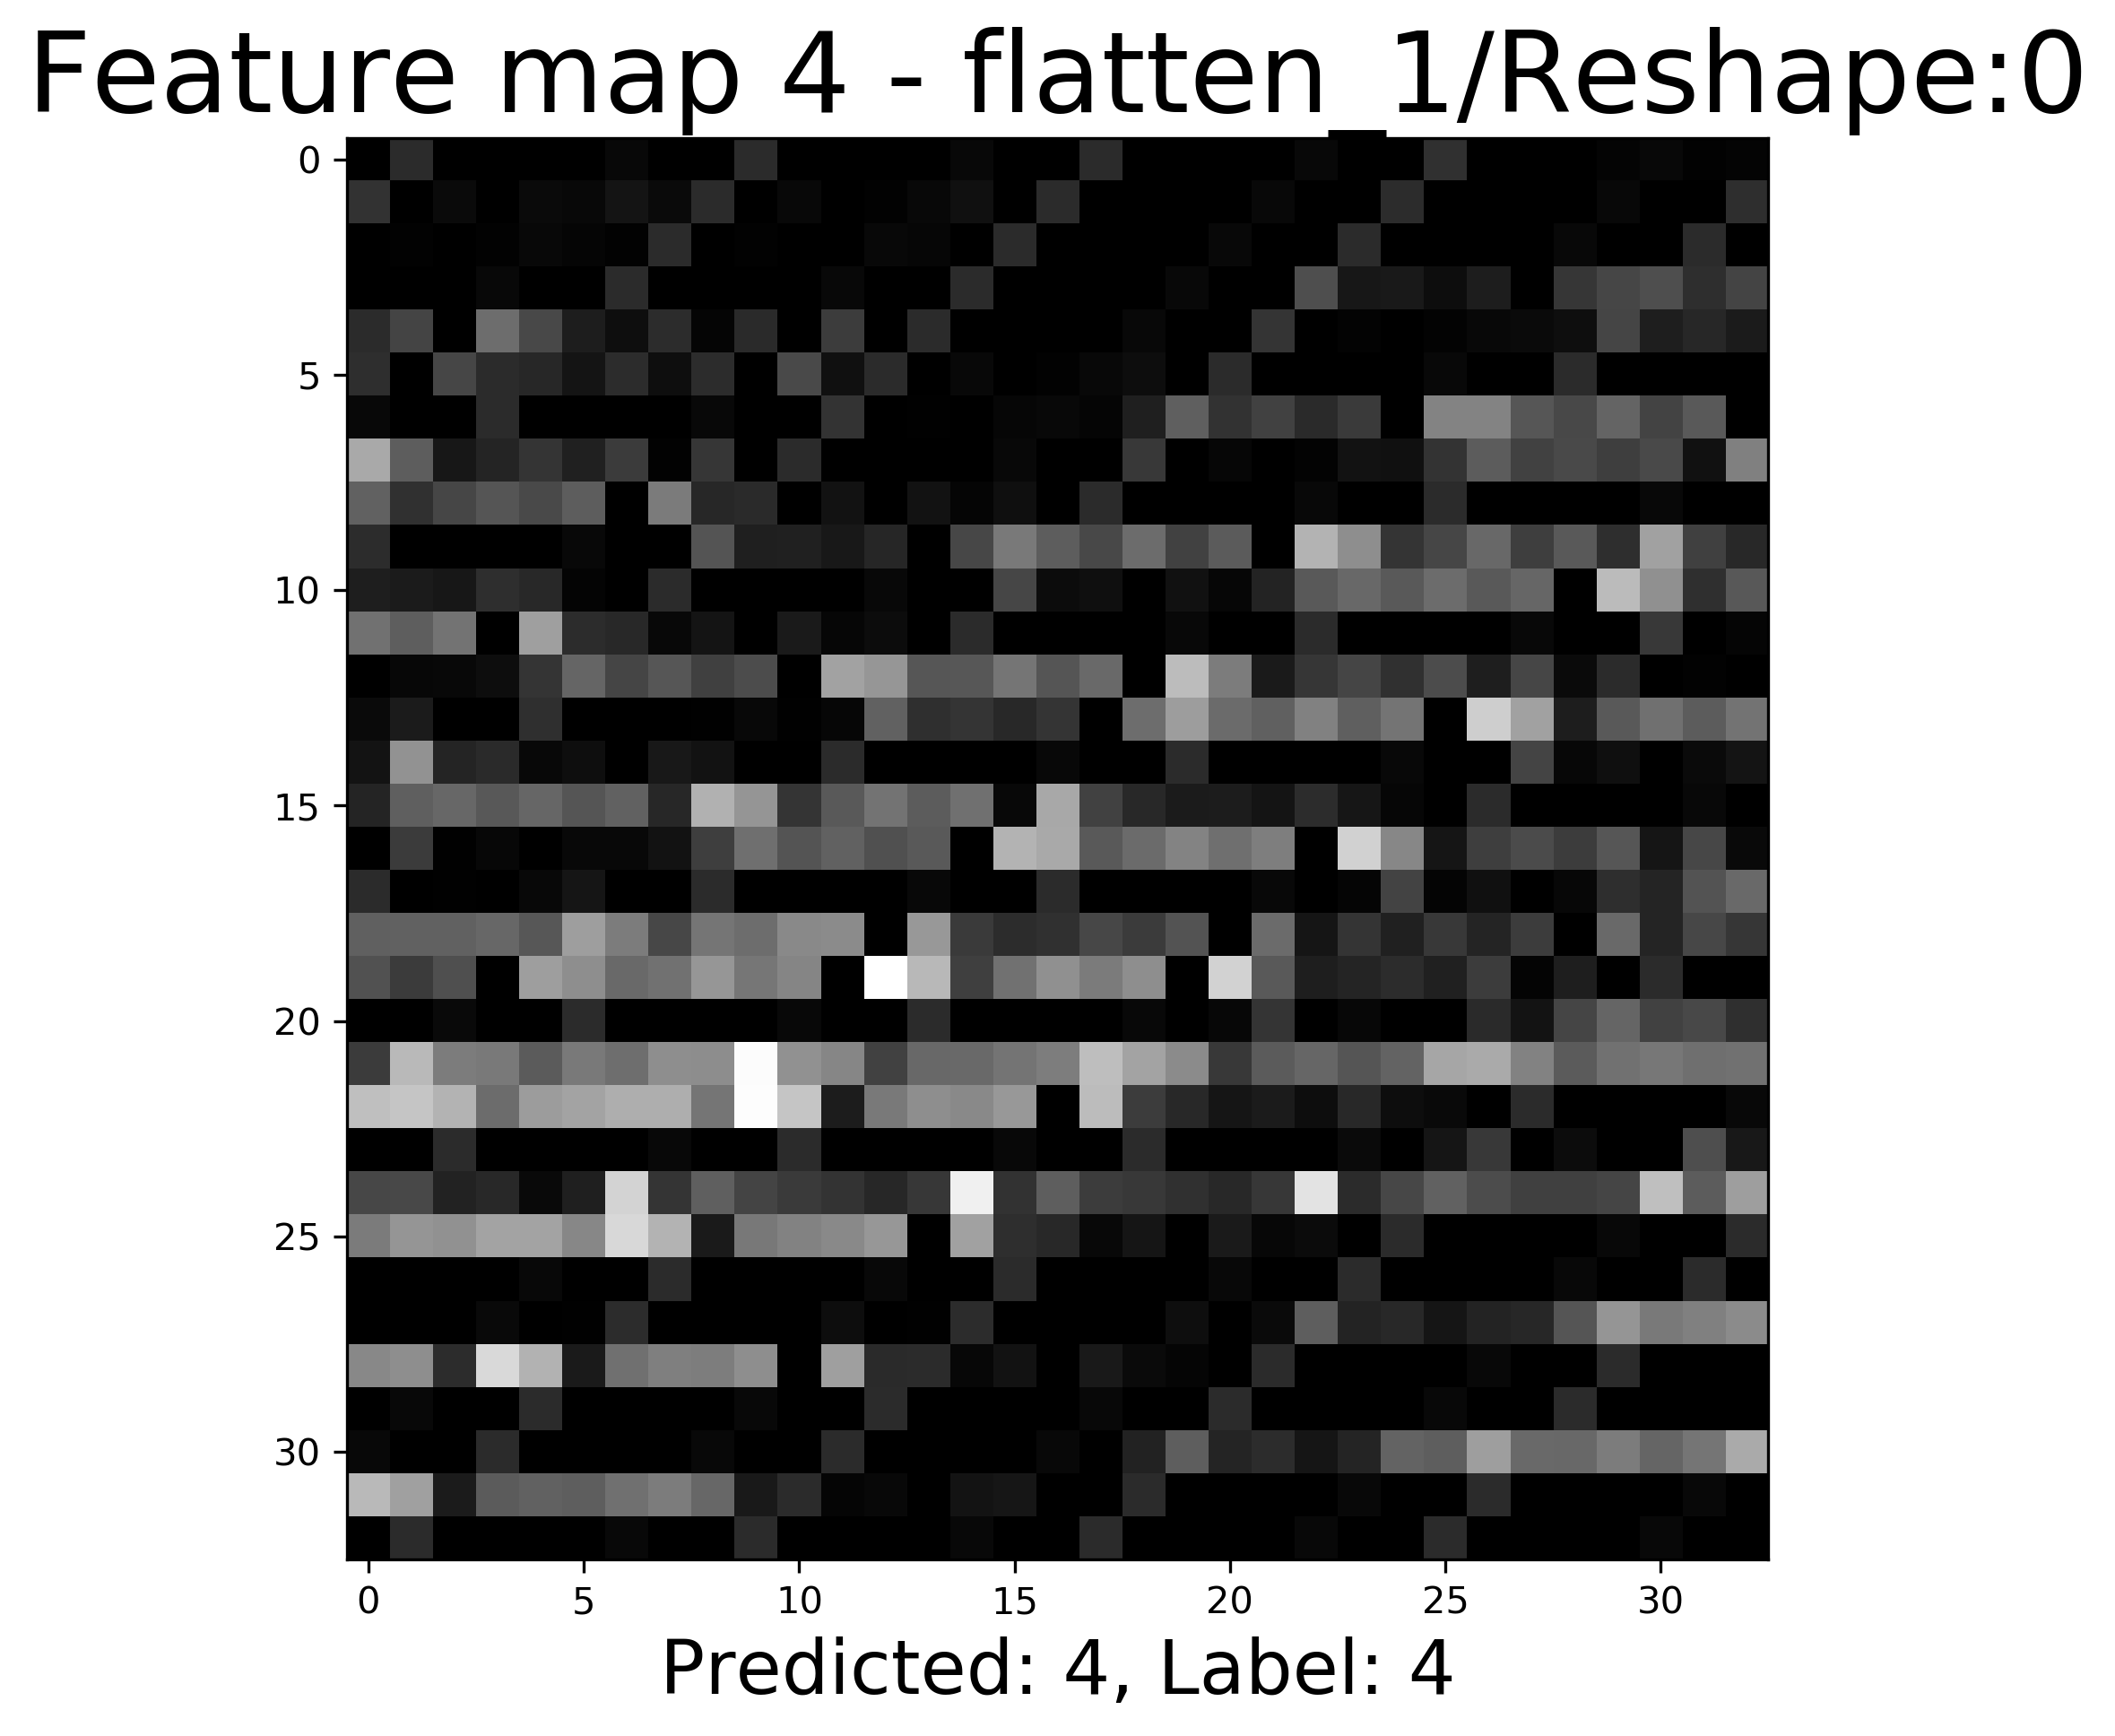

Displaying activation map 4


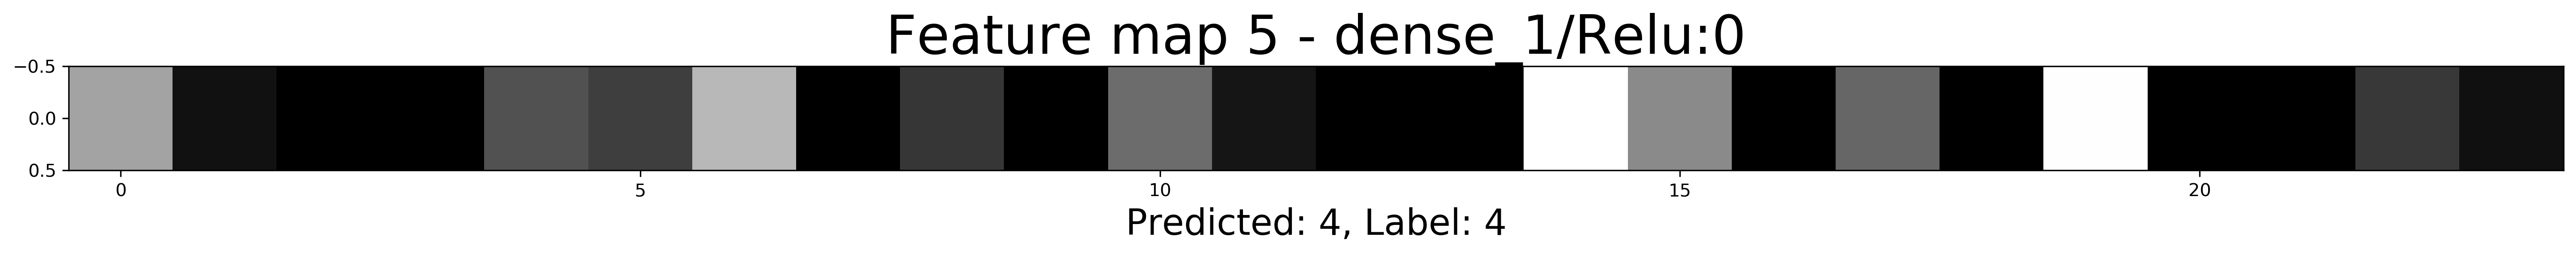

Displaying activation map 5


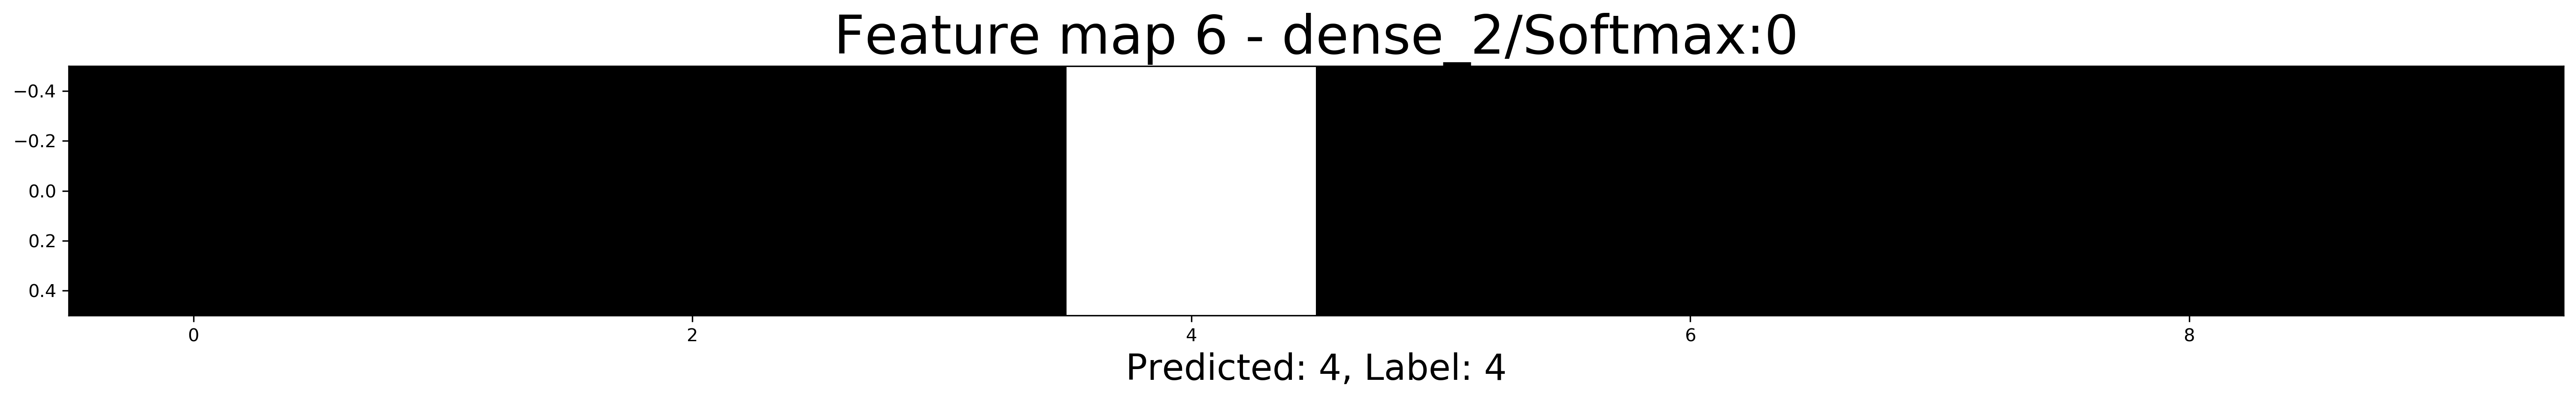

In [16]:
layer_plot = 0
def feature_maps(model, model_inputs, layer_name=None):
    feature_maps = []
    inp_mod = model.input

    model_multi_inputs_cond = True
    if not isinstance(inp_mod, list):
        # only one input! let's wrap it in a list.
        inp_mod = [inp_mod]
        model_multi_inputs_cond = False

    outputs = [layer.output for layer in model.layers if
               layer.name == layer_name or layer_name is None]  
    outputs = [output for output in outputs if 'input_' not in output.name]

    funcs = [K.function(inp_mod + [K.learning_phase()], [out]) for out in outputs]  # evaluation functions

    if model_multi_inputs_cond:
        list_inputs = []
        list_inputs.extend(model_inputs)
        list_inputs.append(0.)
    else:
        list_inputs = [model_inputs, 0.]

    feature_maps = [func(list_inputs)[0] for func in funcs]
    layer_names = [output.name for output in outputs]

    result = dict(zip(layer_names, feature_maps))
    return result

def features_plot(features,layer_plot):
    layer_names = list(features.keys())
    feature_maps = list(features.values())
    batch_size = feature_maps[0].shape[0]
    assert batch_size == 1, 'One image at a time to visualize.'
    for i, f_map in enumerate(feature_maps):
        plt.close()
        print('Displaying activation map {}'.format(i))
        shape = f_map.shape
        if len(shape) == 4:
            features = np.hstack(np.transpose(f_map[0], (2, 0, 1)))
        elif len(shape) == 2:
            features = f_map[0]
            num_features = len(features)
            if num_features > 1024: 
                square_size = int(np.floor(np.sqrt(num_features)))
                features = features[0: square_size * square_size]
                features = np.reshape(features, (square_size, square_size))
            else:
                features = np.expand_dims(features, axis=0)
        else:
            raise Exception('len(shape) = 3 has not been implemented.')
        plt.figure(layer_plot,figsize=(25,7),dpi=300)
        plt.title('Feature map ' +str(i+1) +' - '+ layer_names[i],fontsize=30)
        plt.xlabel('Predicted: {}, Label: {}'.format(correct[4],correct_lbl[4]), fontsize = 20)
        plt.imshow(features, interpolation='None', cmap=plt.cm.gray)
        plt.savefig('layer_' +str(i)+'_g.png')
        layer_plot += 1
        plt.show()
    return layer_plot

feature_maps = feature_maps(model, test_images[classifiedIndexes[4]].reshape(1,28,28,1))
layer_plot = features_plot(feature_maps,layer_plot)